In [343]:
import numpy as np
from numpy.random import randint
from numpy.random import randn
from numpy import ones
from numpy import array
from numpy import linalg
np.set_printoptions(precision=2,suppress=True)
import time
import matplotlib.pyplot as plt

# 1正规方程组求解线性回归

In [344]:
K=100
x = randn(K)+10
o = array(ones(K))
y = x*2+randn(K)
#print(x,o)

def c_data(x,y):
    N = len(x)
    data = np.zeros((N,2))
    for i in range(N):
        data[i,0]=x[i]
        data[i,1]=y[i]
    return data
data = c_data(o,x)

In [345]:
start= time.time()
xtx = np.matmul(data.T,data)
invs = linalg.inv(xtx)
xtx_inv = np.matmul(invs,data.T)
w = np.matmul(xtx_inv,y)
y_ = np.matmul(data,w)
rmse = np.mean(np.sqrt((y_-y)**2))
print(rmse)
print(time.time()-start)

0.842874258725
0.0008409023284912109


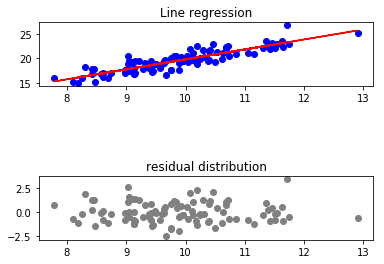

In [346]:
fig = plt.figure()
ax=fig.add_subplot(311)
ax.scatter(x,y,c='b',marker='o')
ax.plot(x,y_,c='r')
ax.set_title("Line regression")

ax1= fig.add_subplot(313)
ax1.scatter(x,y-y_,c='gray',marker='o')
ax1.set_title('residual distribution')
plt.show()

# 2随机梯度下降求解,普通版

In [347]:
w = np.zeros((2))
steps = 100
a = 0.001

# 构造随机数据
def random_index(K):
    list_k = np.arange(K).tolist() # ver important
    index=[]
    while K>0:
        t = np.random.randint(K) #sampling without replace
        index.append(list_k[t])
        list_k.remove(list_k[t])
        K -=1
    return index

In [348]:
def sgd_w(data,steps):
    w = np.zeros(2)
    m,n=data.shape
    rmse = []
    for j in range(steps):
        index = random_index(m)
        data = data[index]
        for i in range(m):
            error = y[i]-np.matmul(data[i],w)
            gd = -data[i]* error
            w = w-a*gd
            # if the  a is big,the lagorithm can no be converged
        y_ = np.matmul(data,w)
        rmse.append(np.mean(np.sqrt((y_-y)**2)))
        
    return w,min(rmse)
w,rmse = sgd_w(data,100)
w,rmse   

(array([ 2.05,  1.68]), 2.1149094219763005)

In [349]:
"""测试用
w=np.zeros(2)
for i in range(100):
    error = y[i]-np.matmul(data[i],w)
    print(error)
    gd = -data[i]* error
    print(gd)
    w = w-0.001*gd
w
a = np.arange(10).tolist()
a.remove(a[1])
#del a[1]
np.matmul(data[2],[2,2])
np.multiply([2,3],2)
np.zeros((2,2))
"""

'测试用\nw=np.zeros(2)\nfor i in range(100):\n    error = y[i]-np.matmul(data[i],w)\n    print(error)\n    gd = -data[i]* error\n    print(gd)\n    w = w-0.001*gd\nw\na = np.arange(10).tolist()\na.remove(a[1])\n#del a[1]\nnp.matmul(data[2],[2,2])\nnp.multiply([2,3],2)\nnp.zeros((2,2))\n'

# 

# 3tf 版随机梯度下降

In [350]:
import tensorflow as tf
from sklearn.utils import shuffle

In [371]:
# （1）参数
w = tf.Variable(tf.random_normal([1],seed=1),name='w') #如何初始化
b = tf.Variable(tf.random_normal([1],seed=1),name='b')

# （2） 变量
X = tf.placeholder('float',name='X')# shape=[None,2])
Y = tf.placeholder('float',name='Y')# shape=[None,1])

# （3） 模型
with tf.name_scope('model'):
    def model(x,w,b):
        y_ = tf.add(tf.multiply(x,w),b)  # 这里注意 是multiply 不是matmul 否则就会出错。
        return y_
    y_ = model(X,w,b)

# （4）损失函数
with tf.name_scope('cost_func'):
    cost= tf.reduce_mean(tf.pow(Y-y_,2))

# （5） 训练
train_op = tf.train.GradientDescentOptimizer(0.0001).minimize(cost) #这个值 不能太大。
   

In [375]:
sess=tf.Session()
init= tf.global_variables_initializer()

tf.train.write_graph(sess.graph,'./dir','graph.pbtxt')
cost_op = tf.summary.scalar('loss',cost)
merged = tf.summary.merge_all()
sess.run(init)
writer = tf.summary.FileWriter('./dir',sess.graph)
N=len(y)

In [383]:
for a in range(1000):
    cost1 = 0.0
    for i,j in zip(x,y):
        sess.run(train_op,feed_dict={X:i,Y:j})
        summary_str =sess.run(cost_op,feed_dict={X:i,Y:j})
        cost1 += sess.run(cost,feed_dict={X:i,Y:j})/N
    writer.add_summary(summary_str,a)
    data,y=shuffle(x,y)

In [384]:
print(sess.run(w))
print(sess.run(b))
cost1

[ 1.62]
[ 3.51]


8.7941712295752978